In [1]:
# Load required libraries

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the data into dataframe

loanapp_df = pd.read_csv("/Users/manikantanvenkataraman/Downloads/archive (1)/loan/loan.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Review the data
loanapp_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Obtain unique values for loan status

loanapp_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [8]:
# Split the dataframe into multiple dataframe based on loan status

charged_off_loans = loanapp_df[loanapp_df.loan_status=='Charged Off']
fully_paid_loans = loanapp_df[loanapp_df.loan_status=='Fully Paid']
current_loans = loanapp_df[loanapp_df.loan_status=='Current']
default_loans = loanapp_df[loanapp_df.loan_status=='Default']
late_31_120_loans = loanapp_df[loanapp_df.loan_status=='Late (31-120 days)']
grace_period_loans = loanapp_df[loanapp_df.loan_status=='In Grace Period']
late_16_30_loans = loanapp_df[loanapp_df.loan_status=='Late (16-30 days)']
issued_loans = loanapp_df[loanapp_df.loan_status=='Issued']

Analysis Objective:

1. Assess if an issued, default, current and late payment loans will charge off.
2. For the charged off loans determine the credit risk factors.


                            Loans in Current Status - Analysis
                            
Per data dictionary provided for the data,
 
         Grade - Loan grades are set based on creditor's profile and nature of contract. A grade is the loan with least risk and G is the grade with highest risk.
         
         
         DTI (Debt to Income Ratio) -A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

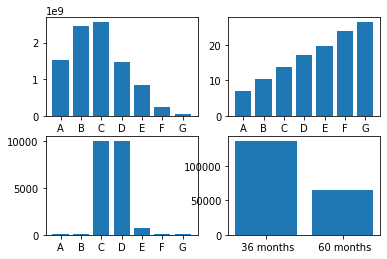

In [68]:
# Grade Vs Loan Amount
pd.set_option('display.float_format', lambda x: '%.5f' % x)
current_grade_amt = current_loans.groupby(['grade'])['loan_amnt'].sum().reset_index()

# Average Rate of interest by grade
current_int_cnt= current_loans.groupby(['grade'])['int_rate'].mean().reset_index()

# Max DTI by grade

current_max_dti= current_loans.groupby(['grade'])['dti'].max().reset_index()

# Loan duration by grade

current_duration= current_loans.groupby(['grade','term'])['id'].count().reset_index()

#current_duration=current_loans.groupby(['grade','term']).agg({'Fee': ['sum','count']})

#Plots for Current Loans
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(current_grade_amt.grade, current_grade_amt.loan_amnt)
plt.xlabel='Grade'
plt.ylabel='Loan Amount'
axs[0,0].set_title='Grade vs Loan Amount'
#axs[0,0].set_ylabel='Loan Amount' 
axs[0,1].bar(current_int_cnt.grade, current_int_cnt.int_rate)
axs[0,1].set_title='Grade vs Average Interest Rate'

axs[1,0].bar(current_max_dti.grade, current_max_dti.dti)
axs[1,0].set_title='Grade vs Max DTI'

# Create brown bars
axs[1,1].bar(current_duration.term, current_duration.id)
axs[1,0].set_title='Count by Term'


plt.show()

                    Loans in Charge off Status - Analysis

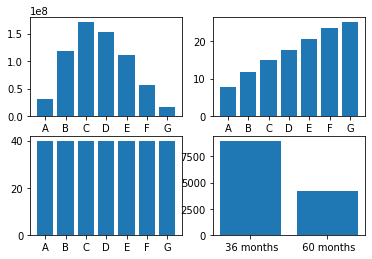

In [69]:
# Grade Vs Loan Amount
pd.set_option('display.float_format', lambda x: '%.5f' % x)
charged_off_grade_amt = charged_off_loans.groupby(['grade'])['loan_amnt'].sum().reset_index()

# Average Rate of interest by grade
charged_off_int_cnt= charged_off_loans.groupby(['grade'])['int_rate'].mean().reset_index()

# Max DTI by grade

charged_off_max_dti= charged_off_loans.groupby(['grade'])['dti'].max().reset_index()

# Loan duration by grade

charged_off_duration= charged_off_loans.groupby(['grade','term'])['id'].count().reset_index()

#Plots for Current Loans
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(charged_off_grade_amt.grade, charged_off_grade_amt.loan_amnt)
plt.xlabel='Grade'
plt.ylabel='Loan Amount'
axs[0,0].set_title='Grade vs Loan Amount'
#axs[0,0].set_ylabel='Loan Amount' 
axs[0,1].bar(charged_off_int_cnt.grade, charged_off_int_cnt.int_rate)
axs[0,1].set_title='Grade vs Average Interest Rate'

axs[1,0].bar(charged_off_max_dti.grade, charged_off_max_dti.dti)
axs[1,0].set_title='Grade vs Max DTI'

# Count by Term
axs[1,1].bar(charged_off_duration.term, charged_off_duration.id)
axs[1,0].set_title='Count by Term'


plt.show()

                            LOANS FULLY PAID ANALYSIS

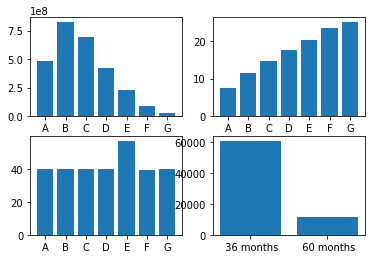

In [70]:
# Grade Vs Loan Amount
pd.set_option('display.float_format', lambda x: '%.5f' % x)
fully_paid_grade_amt = fully_paid_loans.groupby(['grade'])['loan_amnt'].sum().reset_index()

# Average Rate of interest by grade
fully_paid_int_cnt= fully_paid_loans.groupby(['grade'])['int_rate'].mean().reset_index()

# Max DTI by grade

fully_paid_max_dti= fully_paid_loans.groupby(['grade'])['dti'].max().reset_index()

# Loan duration by grade

fully_paid_duration= fully_paid_loans.groupby(['grade','term'])['id'].count().reset_index()

#Plots for Current Loans
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(fully_paid_grade_amt.grade, fully_paid_grade_amt.loan_amnt)
plt.xlabel='Grade'
plt.ylabel='Loan Amount'
axs[0,0].set_title='Grade vs Loan Amount'
#axs[0,0].set_ylabel='Loan Amount' 
axs[0,1].bar(fully_paid_int_cnt.grade, fully_paid_int_cnt.int_rate)
axs[0,1].set_title='Grade vs Average Interest Rate'

axs[1,0].bar(fully_paid_max_dti.grade, fully_paid_max_dti.dti)
axs[1,0].set_title='Grade vs Max DTI'

# Count by Term
axs[1,1].bar(fully_paid_duration.term, fully_paid_duration.id)
axs[1,0].set_title='Count by Term'


plt.show()

                        LOANS IN DEFAULT STATE ANALYSIS

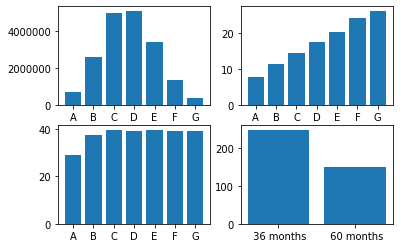

In [76]:

# Grade Vs Loan Amount
pd.set_option('display.float_format', lambda x: '%.5f' % x)
default_grade_amt = default_loans.groupby(['grade'])['loan_amnt'].sum().reset_index()

# Average Rate of interest by grade
default_int_cnt= default_loans.groupby(['grade'])['int_rate'].mean().reset_index()

# Max DTI by grade

default_max_dti= default_loans.groupby(['grade'])['dti'].max().reset_index()

# Loan duration by grade

default_duration= default_loans.groupby(['grade','term'])['id'].count().reset_index()

#Plots for Current Loans
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(default_grade_amt.grade, default_grade_amt.loan_amnt)
plt.xlabel='Grade'
plt.ylabel='Loan Amount'
axs[0,0].set_title='Grade vs Loan Amount'
#axs[0,0].set_ylabel='Loan Amount' 
axs[0,1].bar(default_int_cnt.grade, default_int_cnt.int_rate)
axs[0,1].set_title='Grade vs Average Interest Rate'

axs[1,0].bar(default_max_dti.grade, default_max_dti.dti)
axs[1,0].set_title='Grade vs Max DTI'

# Count by Term
axs[1,1].bar(default_duration.term, default_duration.id)
axs[1,0].set_title='Count by Term'


plt.show()

                            OBSERVATIONS
                            
  1. All charge off loans have DTI as 40.
  2. Fewer A grade loans have charged off as compared to C grade loans.
  3. Rate of interest is in proportion to the grade level.
  4. In all categories the number of short term loans (36 months) are higher than long term      loans.
  5. Number of C grade loans are high in current status and have higher probability to     default. 